In [ ]:
from google.colab import files
uploaded = files.upload()

# ds = pd.read_csv("Z:/marine_life_dataset.csv")

Saving marine_life_dataset.csv to marine_life_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB

ds = pd.read_csv('marine_life_dataset.csv')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  1000 non-null   object 
 1   Species                 1000 non-null   object 
 2   Population              1000 non-null   int64  
 3   Species Category        1000 non-null   object 
 4   Behavior                1000 non-null   object 
 5   Habitat Preference      1000 non-null   object 
 6   Trophic Level           1000 non-null   object 
 7   Water Temperature (°C)  1000 non-null   float64
 8   Nutrient Levels         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


# **Explatory Data Analysis (EDA)**

**Generally cross-clasified in two ways:**

1.   Visualization
  *   Graphical - pictorial/ diagrammatic way
  *   Non-graphical - calculation of summary stat.

2.   Number of variables
    * Univariate - one var (data column)
    * Multivariate - two or more variables, to explore relationships


---
**Univariate**

* non-graph --> tabulation of frequency
* graph --> histograms/ boxplots

**Multivariate**

* non-graph --> cross tabulation
* graph --> scatter (num)/ bar graph (categorical)






## **A. Distribution of Species - diversity accross different region**

> Well-distributed **bold text**

In [ ]:
# cross tabulation
# https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-crosstabulations

cross_tab = pd.crosstab(ds['Species'], ds['Region'], values=ds['Population'], aggfunc='sum', margins=True)
print(cross_tab)

Region     Eastern Reef  Northern Reef  Southern Reef  Western Reef    All
Species                                                                   
Coral              3177           2489           2455          2563  10684
Crab               3603           3266           2944          3674  13487
Fish               2441           3588           2552          3273  11854
Jellyfish          3564           3270           4006          2944  13784
All               12785          12613          11957         12454  49809


<Axes: xlabel='Region'>

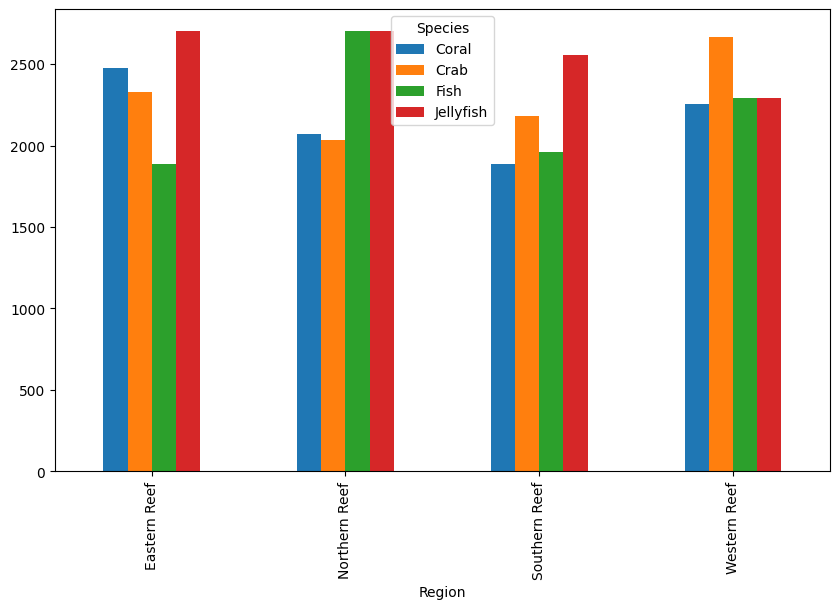

In [ ]:
# https://pandas.pydata.org/docs/user_guide/visualization.html

region_species_population = ds.groupby(['Region', 'Species'])['Population'].sum().unstack() #row, column
region_species_population.plot(kind='bar', figsize=(10, 6)) #stacked=True

## **B. Observable patterns - distinguish between endemic and invasive**

> No, they are well-distributed. No skewed features

Invasive 0    25.334903
1    21.734394
2    25.429249
3    27.366580
9    20.859337
Name: Water Temperature (°C), dtype: float64
Endemic 4    23.642494
5    20.520413
6    27.302908
7    28.570298
8    20.432314
Name: Water Temperature (°C), dtype: float64


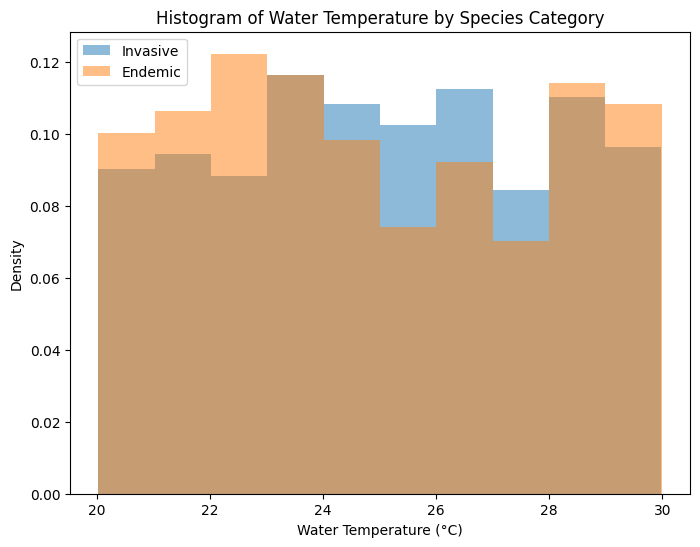

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

plt.figure(figsize=(8, 6))

for species_category in ds['Species Category'].unique():
    data = ds[ds['Species Category'] == species_category]['Water Temperature (°C)']
    # print(species_category, data.iloc[:5])
    plt.hist(data, alpha=0.5, label=species_category, density=True)

plt.xlabel('Water Temperature (°C)')
plt.ylabel('Density')
plt.title('Histogram of Water Temperature by Species Category')

plt.legend()
plt.show()

# density = the y-axis represents the density of data points rather than their raw counts (normalizaed frequency).
# alpha = transparency

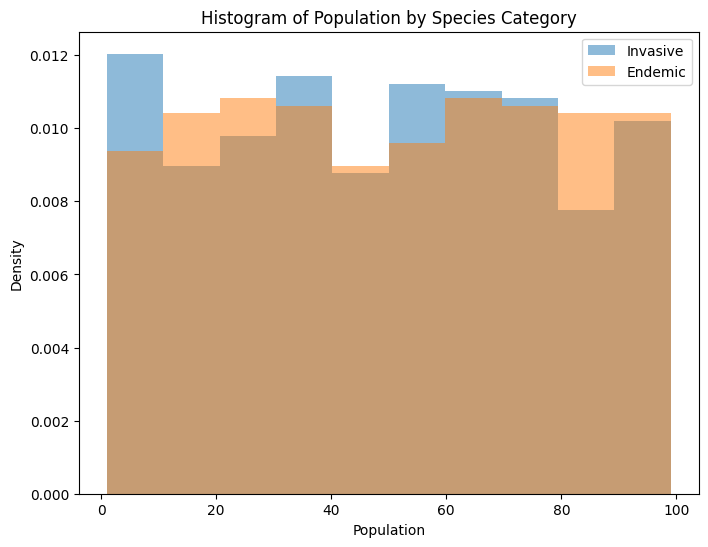

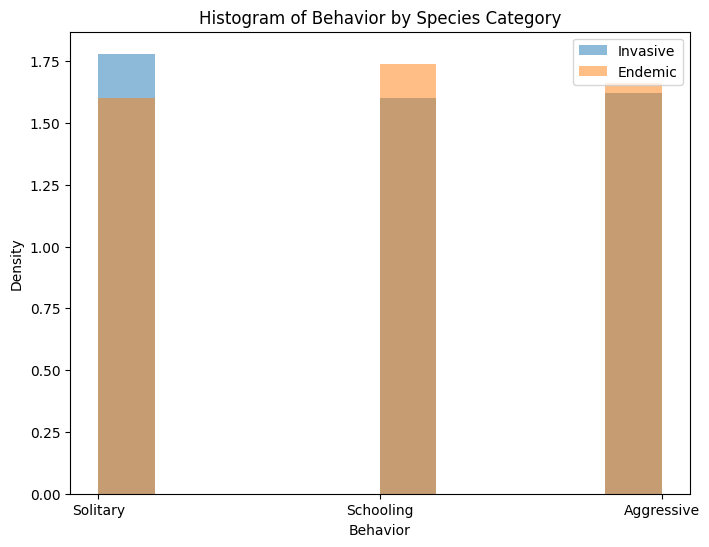

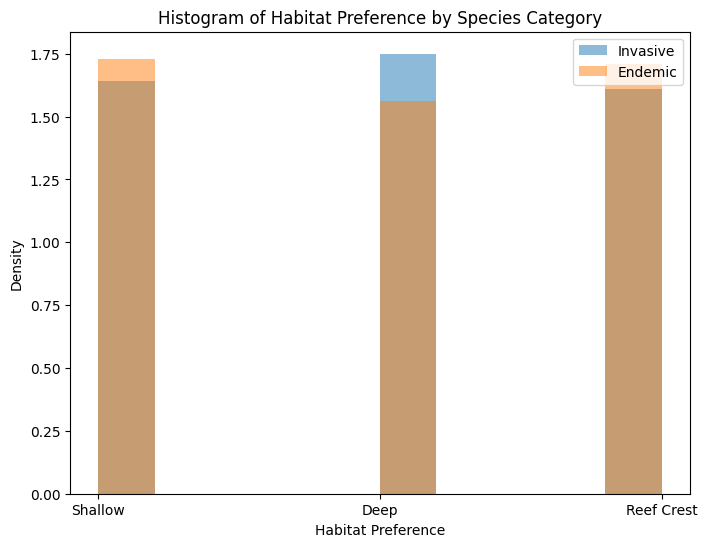

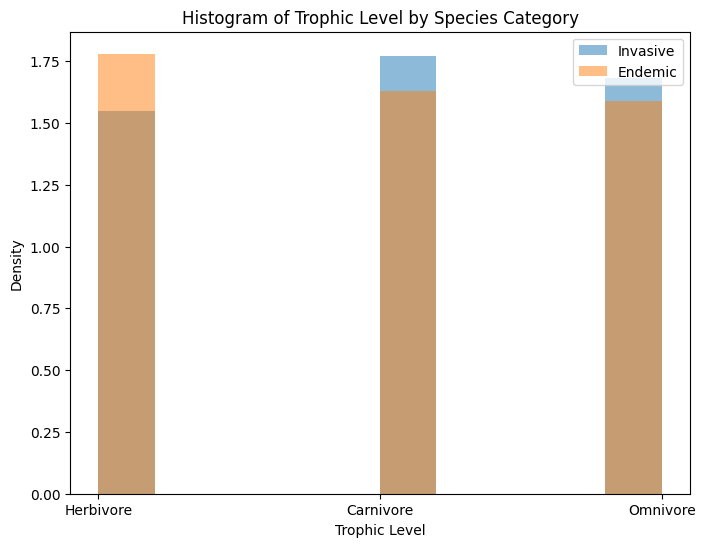

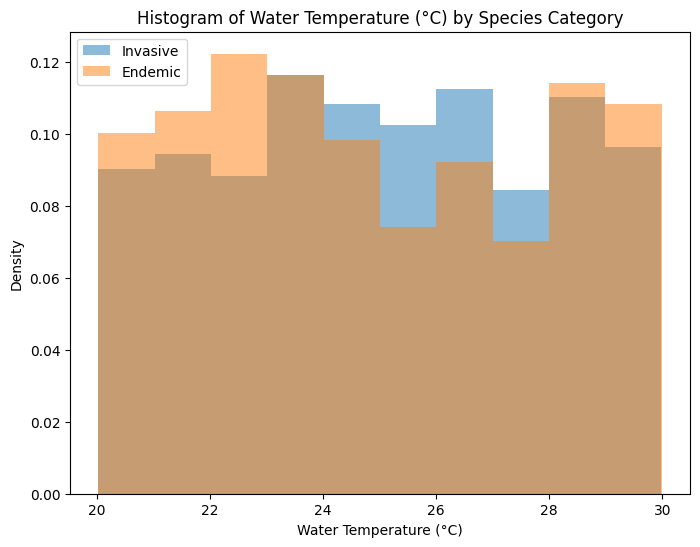

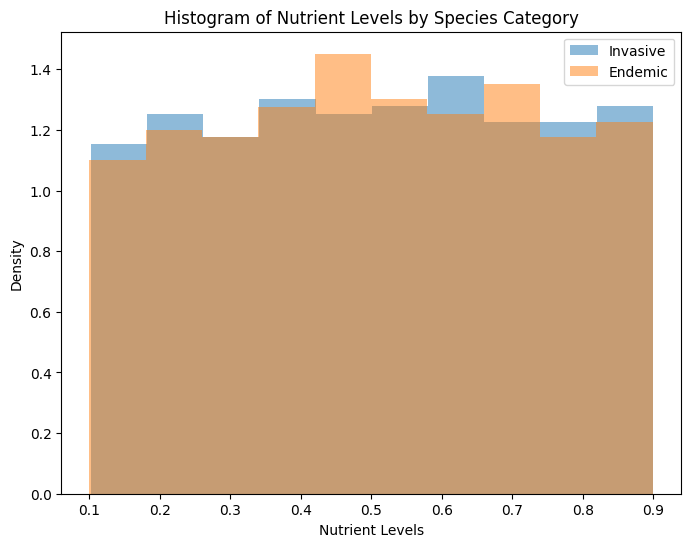

In [ ]:
variables = ['Population', 'Behavior', 'Habitat Preference', 'Trophic Level', 'Water Temperature (°C)', 'Nutrient Levels']

# Create a separate histogram for each variable based on species category
for var in variables:
  plt.figure(figsize=(8, 6))

  for species_category in ds['Species Category'].unique():
      data = ds[ds['Species Category'] == species_category][var]
      plt.hist(data, alpha=0.5, label=species_category, density=True)

  plt.xlabel(var)
  plt.ylabel('Density')
  plt.title(f'Histogram of {var} by Species Category')

  plt.legend()
  plt.show()

# density = the y-axis represents the density of data points rather than their raw counts (normalizaed frequency).
# alpha = transparency

## **C. Environmental Factores (water temp and nutrient levels) vary across diff. regions**

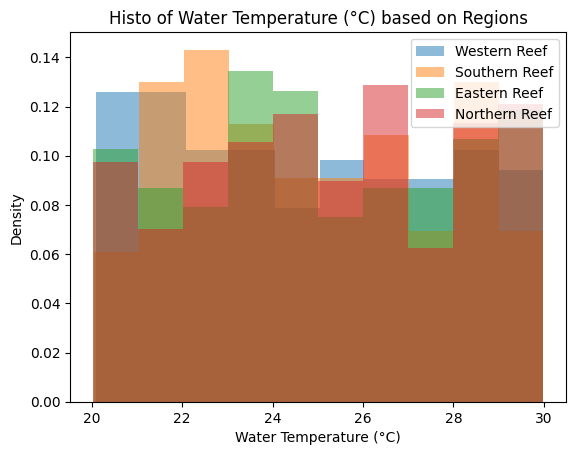

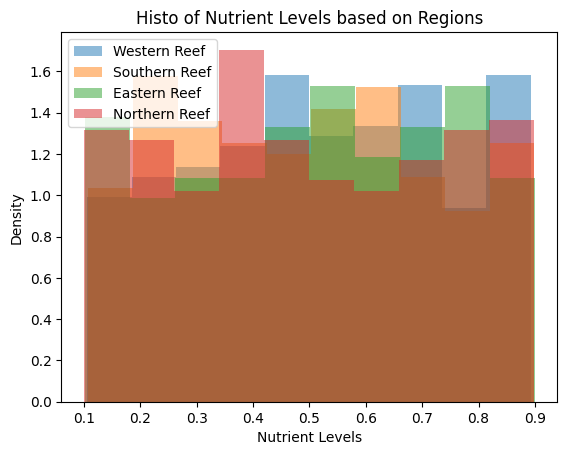

In [ ]:
variables = ['Water Temperature (°C)', 'Nutrient Levels']

for var in variables:
  plt.figure()

  for regions_category in ds['Region'].unique():
    data = ds[ds['Region'] == regions_category][var]

    plt.hist(data, alpha=0.5, density=True, stacked=True, label=regions_category)

  plt.xlabel(var)
  plt.ylabel('Density')
  plt.title(f'Histo of {var} based on Regions')

  plt.legend()
  plt.show()



## Add: Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of Water Temperature vs Nutrient Levels')

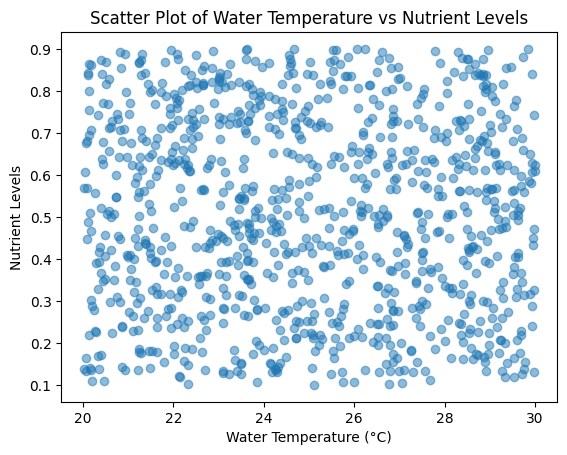

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
# num x num
# water temp x nut level

fig, ax = plt.subplots()

plt.scatter(ds['Water Temperature (°C)'], ds['Nutrient Levels'], alpha=0.5) #x, y

ax.set_xlabel('Water Temperature (°C)')
ax.set_ylabel('Nutrient Levels')
ax.set_title('Scatter Plot of Water Temperature vs Nutrient Levels')

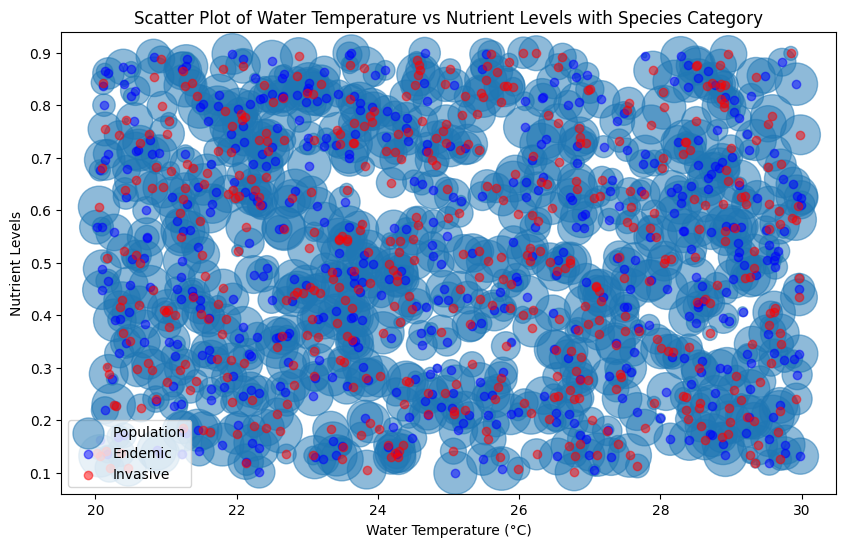

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each species category
colors = {'Endemic': 'blue', 'Invasive': 'red'}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Add population as size of the points
plt.scatter(ds['Water Temperature (°C)'], ds['Nutrient Levels'], s=ds['Population']*10, alpha=0.5, label='Population')

for species_category, color in colors.items():
    data = ds[ds['Species Category'] == species_category]

    plt.scatter(data['Water Temperature (°C)'], data['Nutrient Levels'], alpha=0.5, label=species_category, color=color)


# Add labels and title
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Nutrient Levels')
plt.title('Scatter Plot of Water Temperature vs Nutrient Levels with Species Category')

# Add legend
plt.legend()

plt.show()


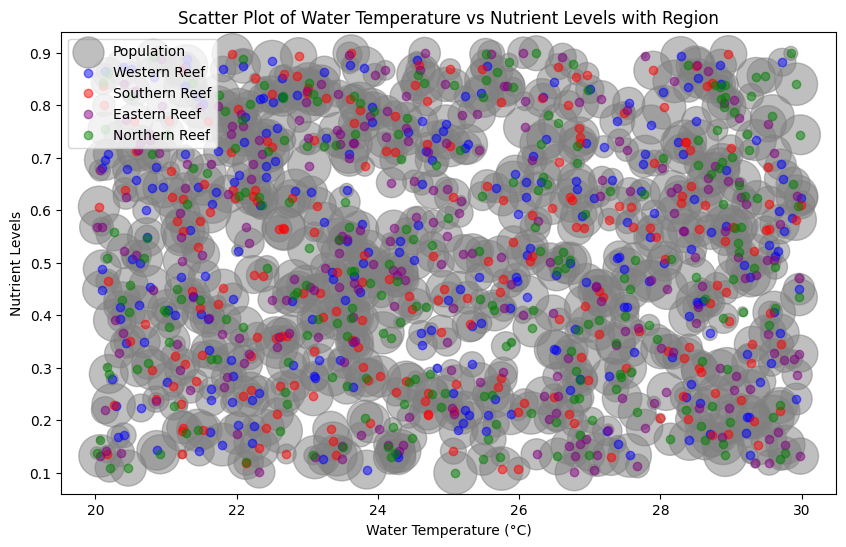

In [ ]:
import matplotlib.pyplot as plt

unique_region = ds['Region'].unique()
colors = {region: color for region, color in zip(unique_region, ['blue', 'red', 'purple', 'green'])}


# Create a scatter plot
plt.figure(figsize=(10, 6))

# Add population as size of the points
plt.scatter(ds['Water Temperature (°C)'], ds['Nutrient Levels'], s=ds['Population']*10, alpha=0.5, label='Population', c='grey')

for region_category, color in colors.items():
    data = ds[ds['Region'] == region_category]

    plt.scatter(data['Water Temperature (°C)'], data['Nutrient Levels'], alpha=0.5, label=region_category, color=color)


# Add labels and title
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Nutrient Levels')
plt.title('Scatter Plot of Water Temperature vs Nutrient Levels with Region')

# Add legend
plt.legend()

plt.show()


# **Preprocessing (Encoding)**

### **A/B. Categorical transformed into numerical**
> Numerical hot encoding

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

encoded_data = pd.get_dummies(ds[['Behavior', 'Habitat Preference', 'Trophic Level']])

# Concatenate the encoded variables with the original dataset
ds_encoded = pd.concat([ds, encoded_data], axis=1)

# Drop the original categorical columns
ds_encoded.drop(['Behavior', 'Habitat Preference', 'Trophic Level'], axis=1, inplace=True) # 1 = column, true = modifying exisitng dataset if false return new dataset

print(encoded_data)

     Behavior_Aggressive  Behavior_Schooling  Behavior_Solitary  \
0                  False               False               True   
1                  False               False               True   
2                  False                True              False   
3                  False                True              False   
4                  False                True              False   
..                   ...                 ...                ...   
995                False                True              False   
996                 True               False              False   
997                False               False               True   
998                 True               False              False   
999                False               False               True   

     Habitat Preference_Deep  Habitat Preference_Reef Crest  \
0                      False                          False   
1                       True                          False   
2     

## **C. Outliers = boxplot**
> No outliers

<Axes: >

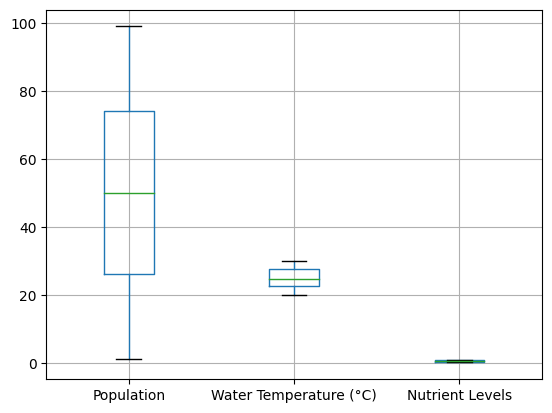

In [ ]:
ds[['Population',	'Water Temperature (°C)', 'Nutrient Levels']].boxplot()

# **Modeling + Evaluation**

> Overfit

* Good = 0.8
* Bad = < 0.8


* Fit --> difference not more than 0.05
* Underfit --> one of them is < 0.8
* Over --> training good, test bad



**Optimize parameter:**

*   Feature selection: Choose variables that have a strong influence
*   Fill-in the missing value (average)
*   Encode categorical variable - ensures that the model learns from the data more accurately.
*   Normalization/ SScaling (min max)



### OBJECTIVE from the case
> Logistic Regression

> One notable aspect is the classification of species as either endemic to the reef or invasive species introduced from other regions.


## **Logistic Regression**

In [ ]:
#Step 1: Import Libraries and Load Data
ds = pd.read_csv('marine_life_dataset.csv')
ds.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [ ]:
#Step 2: Prepare Data

ds = pd.read_csv('marine_life_dataset.csv')

#Drop unecessary columns
ds= ds.drop(columns=['Region'])

ds.head()

,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [ ]:
#Numerical hot encoding

cat_data = ['Species', 'Behavior',	'Habitat Preference',	'Trophic Level']

ds_encoded = pd.get_dummies(ds[cat_data])
ds = pd.concat([ds, ds_encoded], axis=1)
ds = ds.drop(columns=cat_data)

ds.head()

,Population,Species Category,Water Temperature (°C),Nutrient Levels,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow,Trophic Level_Carnivore,Trophic Level_Herbivore,Trophic Level_Omnivore
0,33,Invasive,25.334903,0.306537,False,False,True,False,False,False,True,False,False,True,False,True,False
1,15,Invasive,21.734394,0.421331,False,True,False,False,False,False,True,True,False,False,True,False,False
2,8,Invasive,25.429249,0.713816,False,False,False,True,False,True,False,True,False,False,True,False,False
3,78,Invasive,27.366580,0.343183,False,True,False,False,False,True,False,True,False,False,True,False,False
4,61,Endemic,23.642494,0.349990,False,False,True,False,False,True,False,True,False,False,False,True,False


In [ ]:
#if there's missing value

# #Impute missing values in 'Age' column with mean age
# dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
# # dataset.info()

In [ ]:
# Step 3: Split Data

#Prepare features and target variables
X = ds.drop(columns=['Species Category']) #features
y = ds['Species Category'] #target

In [ ]:
#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [ ]:
# Step 4: Initiate Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=26)

In [ ]:
# Step 5: Fit Model

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=26)

In [ ]:
# Step 6: Prediction

y_pred = model.predict(X_test)

In [ ]:
# Step 7: Evaluate Model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49666666666666665


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = model.predict(X_test)

class_rep_test = classification_report(y_test, y_pred)
print("Test Classification")
print(class_rep_test)

Test Classification
              precision    recall  f1-score   support

     Endemic       0.50      0.48      0.49       152
    Invasive       0.49      0.51      0.50       148

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [ ]:
y_train = model.predict(X_train)

class_rep_train = classification_report(y_train, y_train)
print("Train Classification")
print(class_rep_train)

Train Classification
              precision    recall  f1-score   support

     Endemic       1.00      1.00      1.00       353
    Invasive       1.00      1.00      1.00       347

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



## ** *Other modelling (just as a note) - does not suit the best with the quest * **

### **Linear Regression**
ex: Population prediction

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Load dataset
ds = pd.read_csv('marine_life_dataset.csv')

In [ ]:
#Split data inti training and testing sets
X = ds[['Water Temperature (°C)', 'Nutrient Levels']]
y = ds['Population']

In [ ]:
#AutoSplit data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train) #train a machine learning model on a dataset

LinearRegression()

In [ ]:
#Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (Built-in Approach):", rmse)

Root Mean Squared Error (Built-in Approach): 28.662039509251592


**Loss of OG**

In [ ]:
ds = pd.read_csv('marine_life_dataset.csv')

X = ds[['Water Temperature (°C)', 'Nutrient Levels']]
y = ds['Population']

model.fit(X, y)
prediction = model.predict(X)

loss = abs(prediction-y)

print("The loss mean of the OG: ", loss.mean())

The loss mean of the OG:  24.50897534282251


Tolerance diff. is based on the case
ex: medical, slight difference is crucial

### **Naive Bayes**

> Compute the probability that belongs to each class (first, second, and later compare which one is larger)  likelihood of the data become a class.

Naïve bayes instead logistic regression
Naïve bayes instead logistic regression
* it’s fast since only single class, while in logistic regression we need to do some epochs
* It’s not sensitive to features. So, if we have meaningless classes, implicitly it will be ignore
*	We can work with categorical data, unlike logistic



 Important to note:

  In such cases, Naïve Bayes may not perform as well as logistic regression, which can capture more complex relationships between features.


Types:
1. Gaussian
  * Assumes that features follow a normal (Gaussian) distribution
  * Suitable for continuous features

2. Multinomial
  * Assumes that features represent counts or frequencies
  * Suitable for classification with discrete features (e.g., word counts for text classification)
  * Calculates the probability of each class given the counts of each feature

3. Complement
  * Assumes that the complement of the features of each class is relevant for classification.
  * For imbalanced datasets where one class is significantly more frequent than others.

4. Bernoulli
  * Similar to Multinomial Naive Bayes but assumes binary features (e.g., presence or absence of a feature)
  * Commonly used for text classification tasks where features represent binary occurrence (epresent presence or absence of a particular feature)
  * Calculates the probability of each class given the presence or absence of each feature

5. Categorical
  * Assumes that features follow a categorical distribution and calculates class probabilities using the categorical likelihood.
  * Suitable for classification tasks where the features are represented as categorical variables.

https://scikit-learn.org/stable/modules/naive_bayes.html

1. Gaussian: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
2. Multinomial: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
3. Complement: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB
4. Bernoulli: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
5. Categorical: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

ds = pd.read_csv('marine_life_dataset.csv')

ds= ds.drop(columns=['Region'])

In [ ]:
cat_data = ['Species', 'Behavior',	'Habitat Preference',	'Trophic Level']

ds_encoded = pd.get_dummies(ds[cat_data])
ds = pd.concat([ds, ds_encoded], axis=1)
ds = ds.drop(columns=cat_data)

In [ ]:
X = ds.drop(columns=['Species Category']) #features
y = ds['Species Category'] #target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5133333333333333


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = model.predict(X_test)

class_rep_test = classification_report(y_test, y_pred)
print("Test Classification")
print(class_rep_test)

Test Classification
              precision    recall  f1-score   support

     Endemic       0.52      0.50      0.51       152
    Invasive       0.51      0.53      0.52       148

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300



In [ ]:
y_train = model.predict(X_train)

class_rep_train = classification_report(y_train, y_train)
print("Train Classification")
print(class_rep_train)

Train Classification
              precision    recall  f1-score   support

     Endemic       1.00      1.00      1.00       356
    Invasive       1.00      1.00      1.00       344

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

